In [22]:
import sklearn
from __future__ import print_function 
from sklearn.decomposition import TruncatedSVD 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import Normalizer 
from sklearn import metrics 
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="pandas", lineno=570)
import numpy


example = ["Machine learning is super fun",           "Python is super, super cool",           "Statistics is cool, too",           "Data science is fun",           "Python is great for machine learning",           "I like football",           "Football is great to watch"] 
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english') 
dtm = vectorizer.fit_transform(example) 
pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names ()).head(10)

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
Machine learning is super fun,0,0,0,1,0,1,0,1,0,0,0,1,0
"Python is super, super cool",1,0,0,0,0,0,0,0,1,0,0,2,0
"Statistics is cool, too",1,0,0,0,0,0,0,0,0,0,1,0,0
Data science is fun,0,1,0,1,0,0,0,0,0,1,0,0,0
Python is great for machine learning,0,0,0,0,1,1,0,1,1,0,0,0,0
I like football,0,0,1,0,0,0,1,0,0,0,0,0,0
Football is great to watch,0,0,1,0,1,0,0,0,0,0,0,0,1


In [5]:
# Get words that correspond to each column 
vectorizer.get_feature_names()


['cool',
 'data',
 'football',
 'fun',
 'great',
 'learning',
 'like',
 'machine',
 'python',
 'science',
 'statistics',
 'super',
 'watch']

In [6]:
# Fit LSA. Use algorithm = “randomized” for large datasets 
lsa = TruncatedSVD(2, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [7]:
pd.DataFrame(lsa.components_,index = ["component_1","component_2"],columns = vectorizer.get_feature_names())

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
component_1,0.280004,0.035353,0.033417,0.223993,0.178307,0.338085,0.004555,0.338085,0.391281,0.035353,0.038169,0.672310,0.028861
component_2,0.365270,-0.064548,-0.298349,-0.168056,-0.478428,-0.366379,-0.082792,-0.366379,0.001036,-0.064548,0.101363,0.424306,-0.215557


In [8]:
pd.DataFrame(dtm_lsa, index = example, columns = ["component_1","component_2" ])

,component_1,component_2
Machine learning is super fun,0.957024,-0.290007
"Python is super, super cool",0.856484,0.516174
"Statistics is cool, too",0.563355,0.826215
Data science is fun,0.704171,-0.710030
Python is great for machine learning,0.717284,-0.696781
I like football,0.099136,-0.995074
Football is great to watch,0.235618,-0.971846


In [9]:
xs = [w[0] for w in dtm_lsa] 
ys = [w[1] for w in dtm_lsa] 
xs, ys

([0.95702439393038008,
  0.85648370973755428,
  0.56335489155638718,
  0.70417108799801742,
  0.71728390345517223,
  0.099136388426341579,
  0.23561831047045387],
 [-0.29000742994307704,
  0.51617405490221691,
  0.82621502416712977,
  -0.71003033655449421,
  -0.69678102861954494,
  -0.99507385479158361,
  -0.97184567281593071])

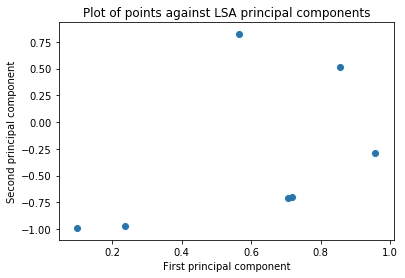

In [19]:
# Plot scatter plot of points %pylab inline 
import matplotlib.pyplot as plt 
plt.figure() 
plt.scatter(xs,ys) 
xlabel('First principal component') 
ylabel('Second principal component') 
title('Plot of points against LSA principal components')
show()

Populating the interactive namespace from numpy and matplotlib


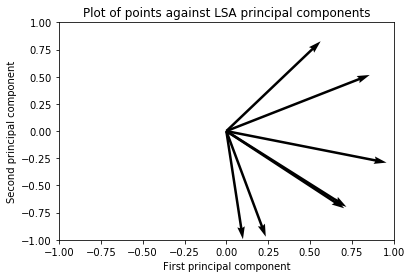

In [18]:
# Plot scatter plot of points with vectors 
%pylab inline 
import matplotlib.pyplot as plt 
plt.figure() 
ax = plt.gca() 
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01) 
ax.set_xlim([-1,1]) 
ax.set_ylim([-1,1]) 
xlabel('First principal component') 
ylabel('Second principal component') 
title('Plot of points against LSA principal components') 
plt.draw() 
plt.show()

In [1]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

In [2]:
path = 'C:/Users/zhongzhu/Documents/GitHub/work/Seattle.pdf'
text = convert_pdf_to_txt(path)

In [3]:
print(text[:10000])

#PAGE <<<1>>>
REPORT NUMBER

91
DATE

Page 1 of 2

01 Nov 2004 - Monday

CONTRACT NUMBER

DACA67-02-D-2012  0004

WEATHER
Weather Caused No Delay
Temperature Min 21 °F, Max 44 °F; No Precipitation; No Wind

CONTRACTORS QUALITY CONTROL REPORT (QCR)

DAILY LOG OF CONSTRUCTION - MILITARY

PROJECT

D/B Replace Military Family Housing P5

CONTRACTOR

Evergreene Construction, L.C.

QC NARRATIVES

Activities in Progress:

AAI
Worked on shutting down water and removing refrigerators

General Comments:

DAILY CONTROL INSPECTIONS AND RESULTS
None today

QUALITY CONTROL TESTING AND RESULTS
None today

REMARKS
No remarks today

Safety Inspection / Safety Meetings:

DAILY SAFETY INSPECTIONS
None today

PREPARATORY AND/OR INITIALS HELD TODAY
Held demo prep meeting today with AAI.  See attached minutes of meeting.  Will start next week with demo.  They brought new 
license, number was okay by Jim LaFluer.

PREP/INITIAL DATES

(Preparatory and initial dates held and advance notice)

No preparatory or 